In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from shubov_algorithms import linear_regression, helpers

# Task
Given the car example below, how can we predict the miles per gallon from cylinders, displacement, horsepower, weight, acceleration and year?

In [2]:
table = pd.read_csv("mllab-03-auto-mpg.csv")
table.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


# Splitting

In [3]:
def train_test_data_split(data, percentage=0.7):
    m, n = data.shape
    idx = np.random.permutation(m)
    training = data[idx[1:round(percentage*m)],:]
    testing = data[idx[round(percentage*m)+1:],:]
    return training, testing

In [4]:
data = table[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year','origin', 'mpg']].values
m, n = data.shape
training, testing = train_test_data_split(data)
X_training = training[:,0:n-1]
y_training = training[:,n-1]
X_testing = testing[:,0:n-1]
y_testing = testing[:,n-1]

# Training

In [5]:
model = linear_regression.LinearRegression(epochs=50)

In [6]:
scaler, X_training_scaled = helpers.scale_train_features(X_training)

In [7]:
mse = model.learn(X_training_scaled, y_training)

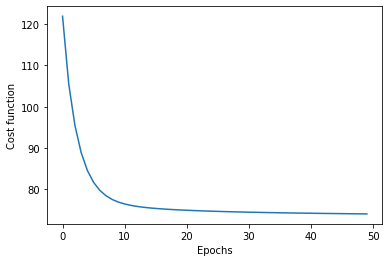

In [8]:
plt.ylabel('Cost function')
plt.xlabel('Epochs')
plt.plot(mse)

# Testing

In [9]:
X_testing_scaled = helpers.scale_test_features(scaler,X_testing)

In [10]:
y_predicted = model.infer(X_testing_scaled)
mse_test = (np.square(y_predicted - y_testing)).mean()
print("Cost function:", mse_test)

Cost function: 77.79441257660247


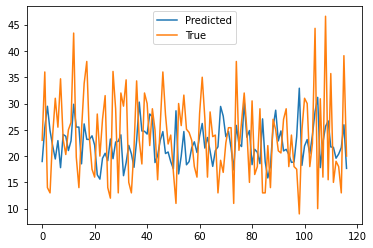

In [11]:
plt.plot(np.array(y_predicted)[:,0], label="Predicted")
plt.plot(y_testing, label="True")
plt.legend()